In [24]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [25]:
print(train_data.shape)
test_data.shape

(404, 13)


(102, 13)

In [26]:
train_targets


array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [27]:
# NORMALIZING THE DATA

mean = train_data.mean(axis = 0)
train_data-= mean
std = train_data.std(axis = 0)
train_data/= std

test_data-=mean
test_data/=std
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [28]:
# MODEL DEFNITION
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)))
  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Dense(1))                                    # NO ACTIVATION FUNCTION SINCE WE DON'T WANT TO RESTRICT OUTPUT RANGE SINCE IT IS LINEAR FUNCTION
  model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
  return model

In [29]:
# VALIDING THE MODEL USING K FOLD 
# SINCE DATA IS SMALL
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
  [train_data[:i * num_val_samples],
  train_data[(i + 1) * num_val_samples:]],
  axis=0)
  partial_train_targets = np.concatenate(
  [train_targets[:i * num_val_samples],
  train_targets[(i + 1) * num_val_samples:]],
  axis=0)
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
  epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)
  print(all_scores)

processing fold # 0
[2.0218541622161865]
processing fold # 1
[2.0218541622161865, 2.623135805130005]
processing fold # 2
[2.0218541622161865, 2.623135805130005, 2.406967878341675]
processing fold # 3
[2.0218541622161865, 2.623135805130005, 2.406967878341675, 2.267117500305176]


In [30]:
print(all_scores)
print(np.mean(all_scores))


[2.0218541622161865, 2.623135805130005, 2.406967878341675, 2.267117500305176]
2.3297688364982605


In [31]:
#Saving the validation logs at each fold
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
  [train_data[:i * num_val_samples],
  train_data[(i + 1) * num_val_samples:]],
  axis=0)

  partial_train_targets = np.concatenate(
  [train_targets[:i * num_val_samples],
  train_targets[(i + 1) * num_val_samples:]],
  axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
  validation_data=(val_data, val_targets),
  epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [32]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_mae_history

[4.83812940120697,
 3.578950524330139,
 3.3533008694648743,
 2.9632450342178345,
 2.9045804142951965,
 2.885446846485138,
 2.707424283027649,
 2.814196228981018,
 2.781058669090271,
 2.603601336479187,
 2.5198035836219788,
 2.6392734050750732,
 2.6277244091033936,
 2.4285603165626526,
 2.5120332837104797,
 2.514030873775482,
 2.4249058961868286,
 2.4272500872612,
 2.4819741249084473,
 2.5490097999572754,
 2.5895986557006836,
 2.4138607680797577,
 2.4412801265716553,
 2.4754130244255066,
 2.523639678955078,
 2.47717148065567,
 2.482901096343994,
 2.391760289669037,
 2.532792031764984,
 2.50790673494339,
 2.3860899209976196,
 2.345188558101654,
 2.465308964252472,
 2.5103896856307983,
 2.5189746022224426,
 2.3361027538776398,
 2.4411903023719788,
 2.3103196918964386,
 2.305058926343918,
 2.4561280608177185,
 2.524843156337738,
 2.437547445297241,
 2.3329851627349854,
 2.4360868334770203,
 2.3582643866539,
 2.396052598953247,
 2.465705543756485,
 2.4869470596313477,
 2.3683687448501587,
 

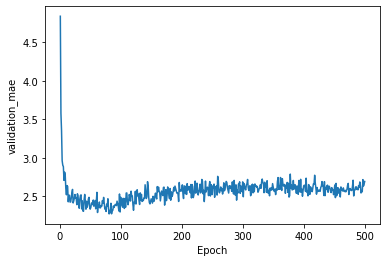

In [33]:
 import matplotlib.pyplot as plt
 plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
 plt.xlabel('Epoch')
 plt.ylabel('validation_mae')
 plt.show()

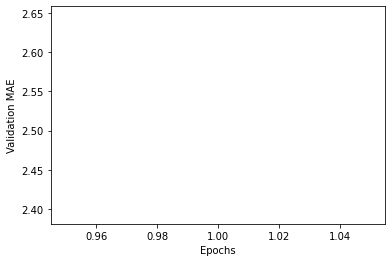

In [34]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [35]:
# BUILDING THE MODEL FROM SCRATCH WITH EPOCH =80
model = build_model()
model.fit(test_data, test_targets, epochs = 80, batch_size = 16, verbose = 0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score


4/4 [==============================] - 0s 2ms/step - loss: 7.2547 - mae: 2.0976


2.0975515842437744